In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [85]:
df =  pd.read_csv("/content/drive/MyDrive/Collab Dataset/Tree Survival Analysis/Tree_Data.csv")

In [86]:
df.sample(4)

,No,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,...,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event,Harvest,Alive
304,867,3,A,Quercus alba,0.080,Med,2016,Acer rubrum,1332,Non-Sterile,...,15.95,20.20,4.48,17.42,23.36,33,115.5,0.0,NaN,X
592,3833,9,D,Prunus serotina,0.073,Low,2017,Sterile,1027,Sterile,...,0.00,NaN,0.35,9.29,10.64,7,24.5,0.0,X,NaN
1221,6717,16,B,Quercus rubra,0.105,Med,2016,Populus grandidentata,1201,Non-Sterile,...,17.00,50.79,3.71,23.31,16.67,7,24.5,0.0,X,NaN
2661,7468,18,C,Quercus alba,0.140,High,2016,Quercus rubra,1688,Non-Sterile,...,12.03,43.39,5.58,21.03,19.35,33,115.5,0.0,NaN,X


In [87]:
df.columns

Index(['No', 'Plot', 'Subplot', 'Species', 'Light_ISF', 'Light_Cat', 'Core',
       'Soil', 'Adult', 'Sterile', 'Conspecific', 'Myco', 'SoilMyco',
       'PlantDate', 'AMF', 'EMF', 'Phenolics', 'Lignin', 'NSC', 'Census',
       'Time', 'Event', 'Harvest', 'Alive'],
      dtype='object')

In [88]:
print(df['Species'].value_counts())

Species
Acer saccharum     751
Prunus serotina    749
Quercus alba       673
Quercus rubra      610
Name: count, dtype: int64


In [89]:
print(df['Soil'].value_counts())

Soil
Sterile                  423
Prunus serotina          413
Quercus rubra            402
Acer saccharum           397
Populus grandidentata    391
Quercus alba             381
Acer rubrum              376
Name: count, dtype: int64


In [90]:
print(df['Light_Cat'].value_counts())

Light_Cat
Med     1474
Low     1005
High     304
Name: count, dtype: int64


In [91]:
print(df['Conspecific'].value_counts())

Conspecific
Heterospecific    1974
Sterilized         423
Conspecific        386
Name: count, dtype: int64


Data cleaning

In [92]:
df.describe(include='object')

,Subplot,Species,Light_Cat,Soil,Adult,Sterile,Conspecific,Myco,SoilMyco,PlantDate,Harvest,Alive
count,2783,2783,2783,2783,2783,2783,2783,2783,2783,2783,704,491
unique,5,4,3,7,36,2,3,2,3,19,1,1
top,A,Acer saccharum,Med,Sterile,I,Non-Sterile,Heterospecific,AMF,AMF,6/7/18,X,X
freq,701,751,1474,423,90,2360,1974,1500,1186,340,704,491


Comment: All records missing EMF data are AMF Mycorrhizal type seedling species ('Myco' == 'AMF').
This indicates that EMF data was not measured for seedling species associated with arbuscular mycorrhizal fungi (AMF).

In [93]:
# EMF: We will assume that AMF-associated seedlings do not have any EMF colonization.
# EMF: We will replace missing EMF values with 0 for AMF-associated seedlings.
# Alive: We will replace na with 'Not Alive' and 'X' with 'Alive'.
df['EMF'].fillna(0, inplace=True)
df['Alive'].fillna('Not Alive', inplace=True)
df['Alive'] = df['Alive'].replace('X', 'Alive')
df.isna().sum()

,0
No,0
Plot,0
Subplot,0
Species,0
Light_ISF,0
Light_Cat,0
Core,0
Soil,0
Adult,0
Sterile,0


In [94]:
df['Event'] = df['Event'].dropna()


In [95]:
df.drop(columns=['Harvest','PlantDate','No', 'Plot','Subplot'], inplace=True)

In [96]:
df.head(2)

,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,Conspecific,Myco,SoilMyco,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event,Alive
0,Acer saccharum,0.106,Med,2017,Prunus serotina,I,Non-Sterile,Heterospecific,AMF,AMF,22.00,0.00,-0.56,13.86,12.15,4,14.0,1.0,Not Alive
1,Quercus alba,0.106,Med,2017,Quercus rubra,970,Non-Sterile,Heterospecific,EMF,EMF,15.82,31.07,5.19,20.52,19.29,33,115.5,0.0,Alive


Handeling Catagorical Data

In [97]:
from sklearn.preprocessing import OrdinalEncoder

In [98]:
encoded_df = df.copy()

In [99]:
cat_cols_train = df.select_dtypes(include='object').columns

for col in cat_cols_train:
  oe = OrdinalEncoder()
  encoded_df[col] = oe.fit_transform(df[[col]])
  print(col)
  print(oe.categories)

Species
auto
Light_Cat
auto
Soil
auto
Adult
auto
Sterile
auto
Conspecific
auto
Myco
auto
SoilMyco
auto
Alive
auto


In [100]:
encoded_df.sample(5)

,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,Conspecific,Myco,SoilMyco,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event,Alive
1557,0.0,0.087,2.0,2017,3.0,0.0,0.0,1.0,0.0,0.0,20.69,0.00,-0.57,14.06,12.30,11,38.5,1.0,1.0
2562,0.0,0.103,2.0,2017,3.0,26.0,0.0,1.0,0.0,0.0,22.16,0.00,-0.64,13.88,12.13,15,52.5,1.0,1.0
2537,2.0,0.103,2.0,2017,0.0,7.0,0.0,1.0,1.0,0.0,13.90,21.05,4.71,17.55,24.28,15,52.5,1.0,1.0
1518,0.0,0.086,2.0,2017,3.0,32.0,0.0,1.0,0.0,0.0,21.35,0.00,-0.58,14.11,12.20,10,35.0,1.0,1.0
501,3.0,0.061,1.0,2016,4.0,23.0,0.0,1.0,1.0,1.0,12.00,5.00,3.80,22.54,16.83,7,24.5,0.0,1.0


In [101]:
df.describe()

,Light_ISF,Core,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event
count,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,2782.000000
mean,0.085707,2016.648940,20.553069,12.206134,1.933105,15.759792,14.219641,15.282070,53.487244,0.570453
std,0.025638,0.477387,12.309587,17.372395,1.969842,6.779607,4.298271,9.166555,32.082942,0.495100
min,0.032000,2016.000000,0.000000,0.000000,-1.350000,2.230000,4.300000,4.000000,14.000000,0.000000
25%,0.066000,2016.000000,13.400000,0.000000,0.170000,10.355000,11.605000,7.000000,24.500000,0.000000
50%,0.082000,2017.000000,18.000000,0.000000,0.750000,14.040000,12.660000,13.000000,45.500000,1.000000
75%,0.100000,2017.000000,24.445000,25.915000,3.780000,21.115000,17.275000,18.000000,63.000000,1.000000
max,0.161000,2017.000000,100.000000,87.500000,6.100000,32.770000,29.450000,33.000000,115.500000,1.000000


In [102]:
palette = sns.color_palette('viridis')
def kdeplot_and_boxplot(df, columns):
    fig, ax = plt.subplots(4, 2, figsize = (30, 40))
    ax = ax.flatten()

    for i, col in enumerate(columns):
        sns.histplot(x = col, data=df, ax=ax[2 * i], color=palette[i], kde=True, lw=1.5, edgecolor='black')
        ax[2*i].set_title(col, fontweight = 'bold', fontfamily='serif', fontsize=20)
        sns.boxplot(x = col, data=df, ax=ax[2 * i+1], color=palette[i])
        ax[2 * i+1].set_title(col, fontweight = 'bold', fontfamily='serif', fontsize=20)

    plt.show()

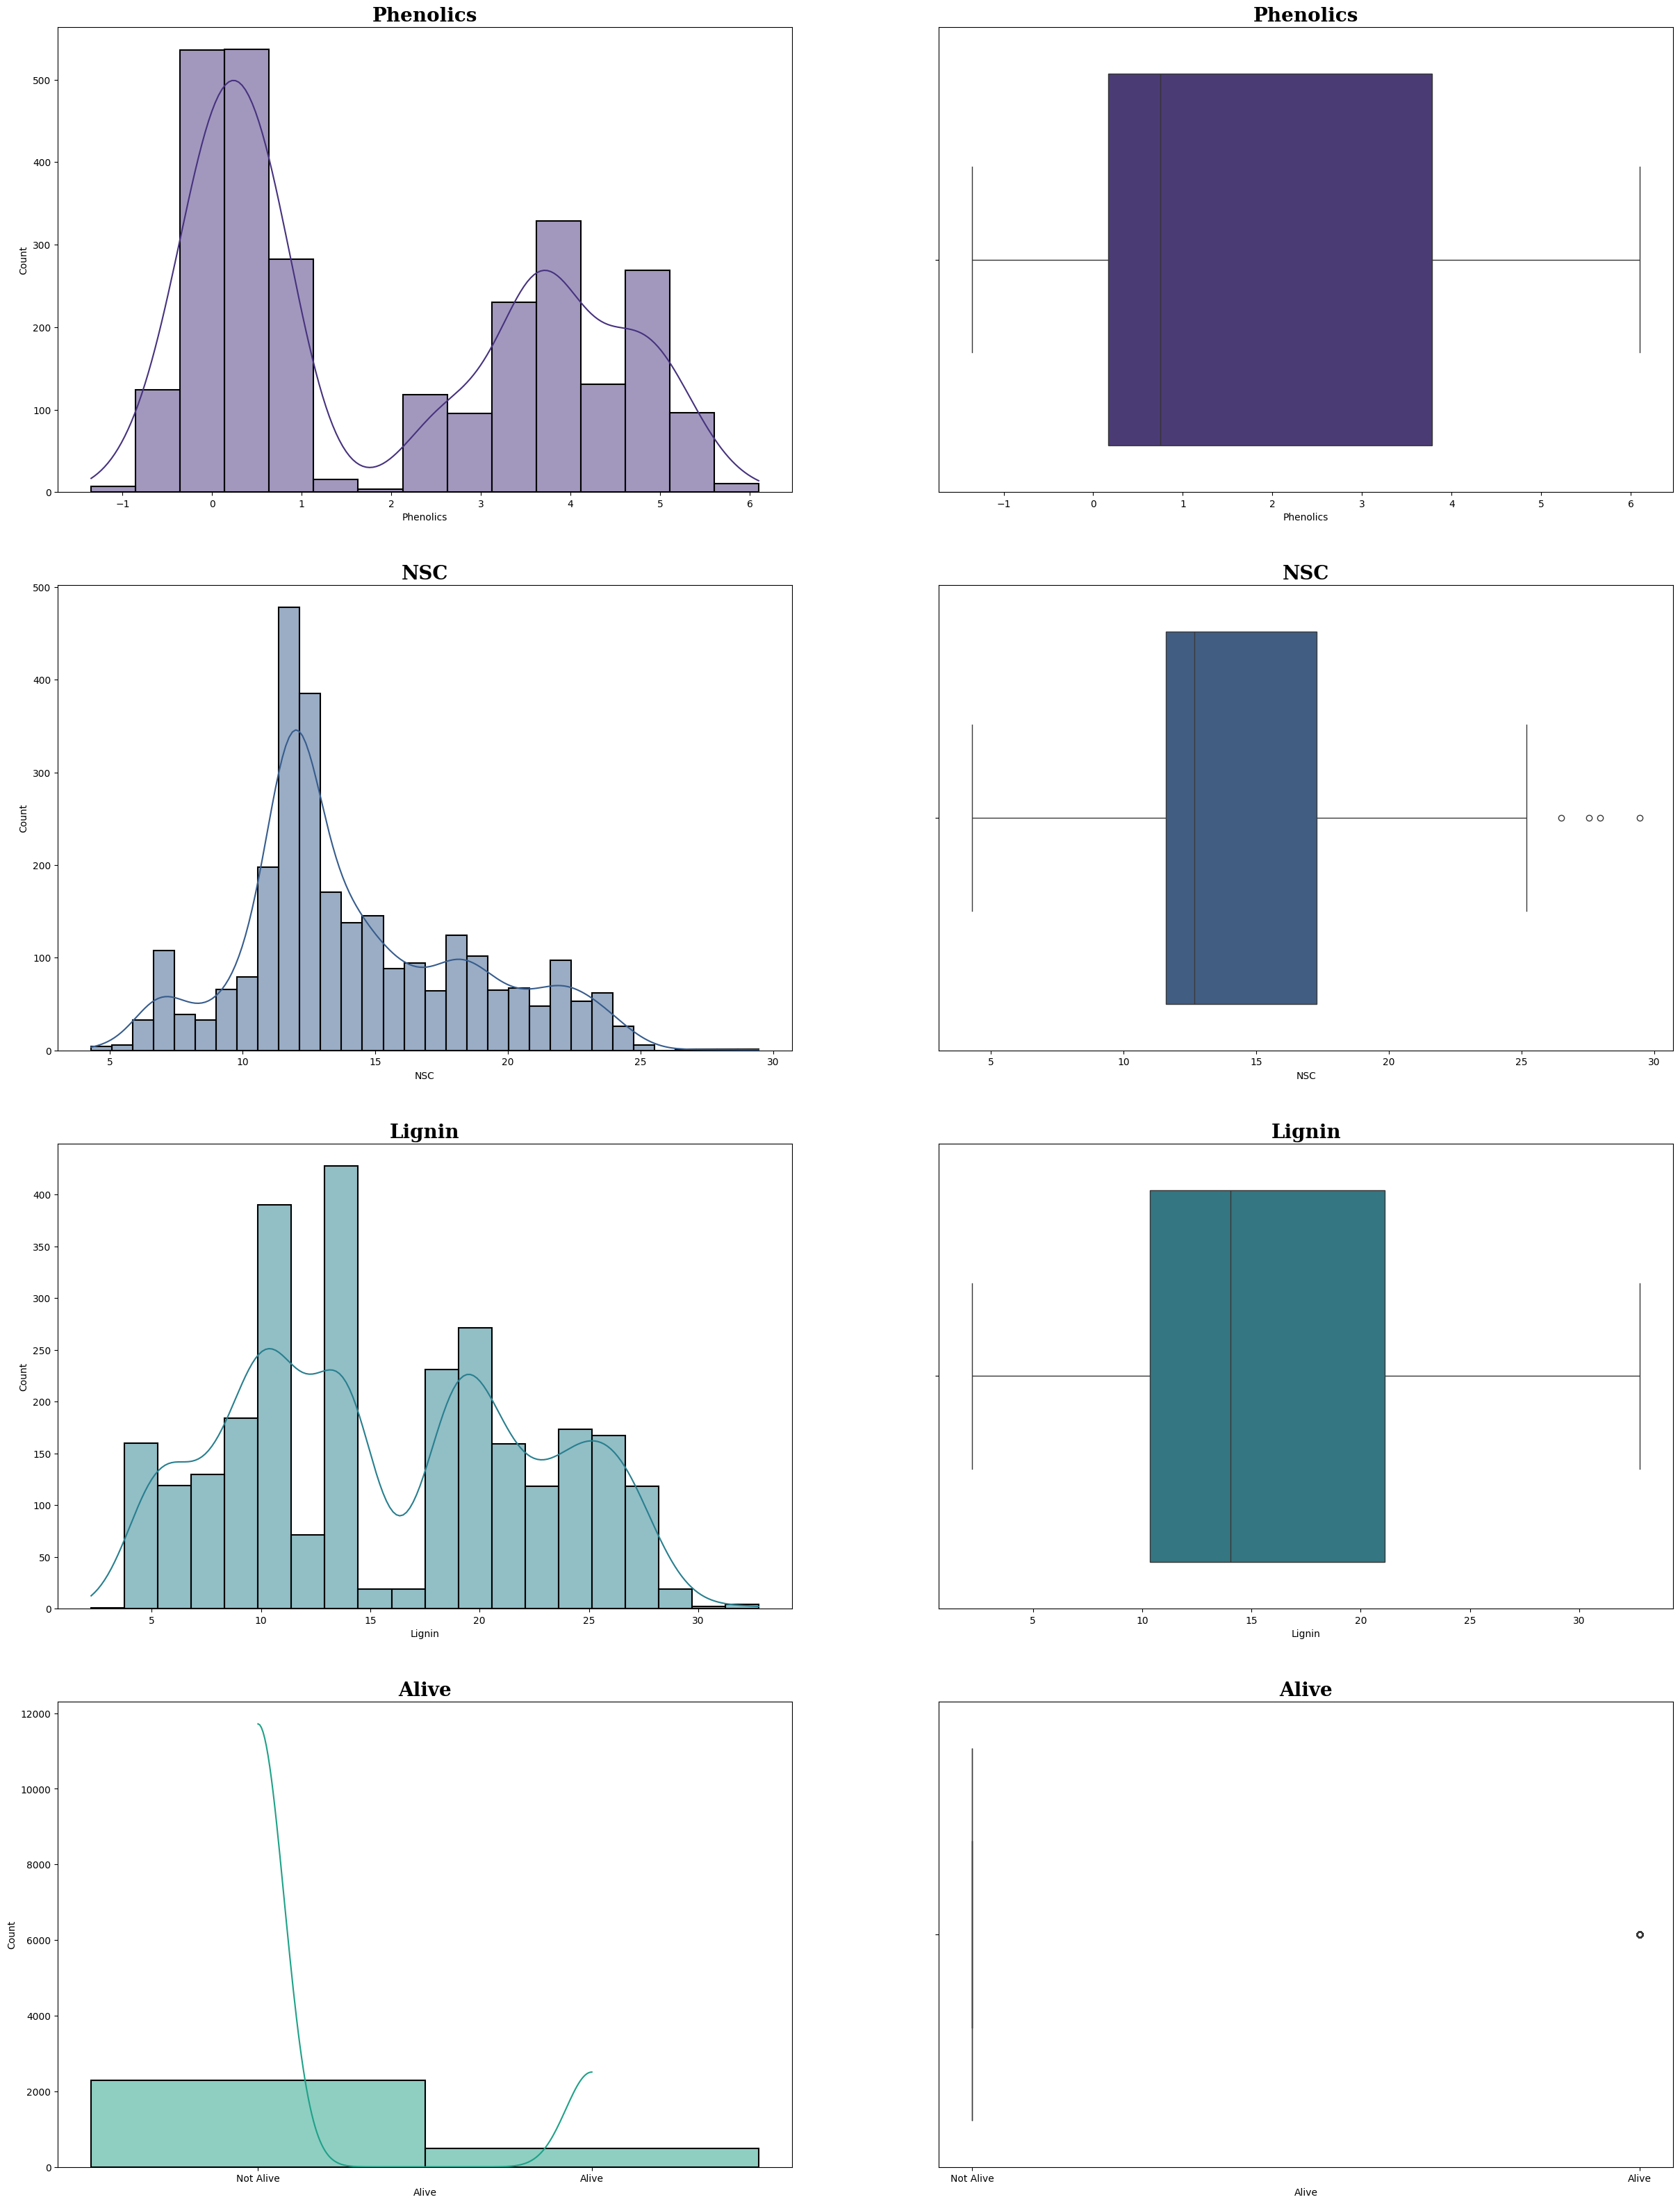

In [103]:
num_columns = ['Phenolics', 'NSC', 'Lignin', 'Alive'] # Updated column names
kdeplot_and_boxplot(df,num_columns)

No Outliers detected exept NSC
Lets Handle it


In [104]:
encoded_df.columns

Index(['Species', 'Light_ISF', 'Light_Cat', 'Core', 'Soil', 'Adult', 'Sterile',
       'Conspecific', 'Myco', 'SoilMyco', 'AMF', 'EMF', 'Phenolics', 'Lignin',
       'NSC', 'Census', 'Time', 'Event', 'Alive'],
      dtype='object')

In [105]:
#calculating IQR for treedbh
per_25= encoded_df['NSC'].quantile(0.25)
per_75= encoded_df['NSC'].quantile(0.75)
iqr= per_75-per_25

In [106]:
upper_limit = per_75 + 1.5*iqr
lower_limit = per_25 - 1.5*iqr

In [107]:
print(upper_limit)
print(lower_limit)

25.779999999999994
3.100000000000003


In [108]:
encoded_df = encoded_df[(encoded_df['NSC'] < upper_limit) & (encoded_df['NSC'] > lower_limit)]

In [109]:
encoded_df.shape

(2779, 19)

  **Creating a new DataFrame df_traits_AMF which includes traits and AMF.**

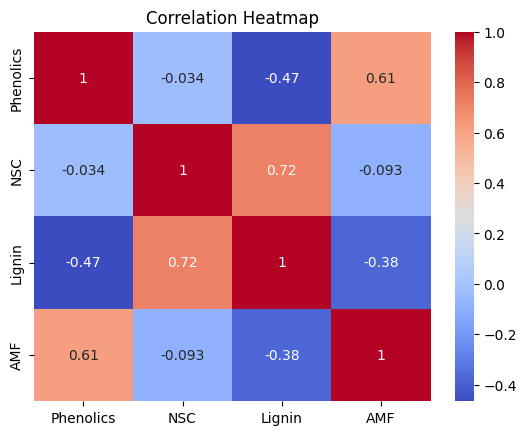

In [110]:
 # Creating a new DataFrame df_traits_AMF which includes traits and AMF.
traits_AMF = ['Phenolics', 'NSC', 'Lignin', 'AMF']
df_traits_AMF = df[traits_AMF][df['Myco']=='AMF']

# Calculate correlation matrix
correlation_matrix = df_traits_AMF[['Phenolics', 'NSC', 'Lignin', 'AMF']].corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Comment:
The correlation analysis provides insights into the relationships between AMF colonization and various traits of the seedlings:

Positive relationship with phenolics suggests a potential enhancement in defensive compounds.
Negligible relationship with NSC indicates little impact on carbohydrate storage.
Negative relationship with lignin suggests a possible trade-off between structural integrity and the benefits provided by AMF.

** Creating a new DataFrame df_traits_EMF which includes traits and EMF.**

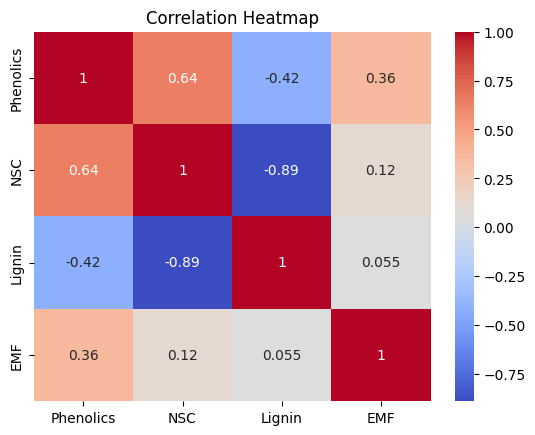

In [111]:

traits_EMF = ['Phenolics', 'NSC', 'Lignin', 'EMF']
df_traits_EMF = df[traits_EMF][df['Myco']=='EMF']

# Calculate correlation matrix
correlation_matrix = df_traits_EMF[['Phenolics', 'NSC', 'Lignin', 'EMF']].corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Comment:
The correlation analysis provides insights into the relationships between EMF colonization and traits of the seedlings:

Weak to moderate positive relationship with phenolics suggests a potential minor enhancement in defensive compounds.
Negligible relationship with NSC indicates little impact on carbohydrate storage.
Negligible relationship with lignin indicates little impact on the structural integrity.

In [112]:
X = encoded_df.drop('Event', axis=1)
y = encoded_df['Event']

In [113]:
X

,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,Conspecific,Myco,SoilMyco,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Alive
0,0.0,0.106,2.0,2017,3.0,34.0,0.0,1.0,0.0,0.0,22.00,0.00,-0.56,13.86,12.15,4,14.0,1.0
1,2.0,0.106,2.0,2017,5.0,30.0,0.0,1.0,1.0,1.0,15.82,31.07,5.19,20.52,19.29,33,115.5,0.0
2,3.0,0.106,2.0,2017,3.0,35.0,0.0,1.0,1.0,0.0,24.45,28.19,3.36,24.74,15.01,18,63.0,1.0
3,0.0,0.080,2.0,2016,3.0,35.0,0.0,1.0,0.0,0.0,22.23,0.00,-0.71,14.29,12.36,4,14.0,1.0
4,0.0,0.060,1.0,2017,3.0,26.0,0.0,1.0,0.0,0.0,21.15,0.00,-0.58,10.85,11.20,4,14.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2778,1.0,0.111,2.0,2017,2.0,27.0,0.0,1.0,0.0,1.0,40.89,0.00,0.83,9.15,11.88,16,56.0,1.0
2779,2.0,0.118,2.0,2017,0.0,13.0,0.0,1.0,1.0,0.0,15.47,32.82,4.88,19.01,23.50,16,56.0,1.0
2780,2.0,0.118,2.0,2017,5.0,12.0,0.0,1.0,1.0,1.0,11.96,37.67,5.51,21.13,19.10,16,56.0,1.0
2781,2.0,0.161,0.0,2017,6.0,4.0,1.0,2.0,1.0,2.0,16.99,22.51,4.28,19.38,21.36,33,115.5,1.0


In [114]:
y

,Event
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
2778,1.0
2779,1.0
2780,1.0
2781,NaN


In [115]:
# prompt: drop NaN value from the y

y = y.dropna()


In [117]:
from sklearn.model_selection import train_test_split

# Reset X and y to their original values before dropping NaN from y
X = encoded_df.drop('Event', axis=1)
y = encoded_df['Event']

# Drop rows with NaN values from both X and y
X = X[y.notna()]  # Keep rows in X where y is not NaN
y = y.dropna()   # Drop NaN values from y

# Now X and y should have the same number of samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=8)

In [118]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2361, 18)
(417, 18)
(2361,)
(417,)


**defining a function for Model Evaluation**

In [119]:

from sklearn.metrics import mean_squared_error, r2_score
def model_eval(actual, predicted):
  rmse = np.sqrt(mean_squared_error(actual, predicted))
  r2 = r2_score(actual, predicted)
  print('The RMSE value for the model is: ', round(rmse,3))
  print('The R2 Score for the model is: ', round(r2, 3))

# Linear Regression

In [120]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_train = lr.predict(X_train)
lr_test = lr.predict(X_test)

In [121]:
model_eval(y_train, lr_train)

The RMSE value for the model is:  0.253
The R2 Score for the model is:  0.739


In [122]:
model_eval(y_test, lr_test)

The RMSE value for the model is:  0.267
The R2 Score for the model is:  0.708


# Logistic Regression

In [123]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X_train, y_train)
lor_train = lor.predict(X_train)
lor_test = lor.predict(X_test)


In [125]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = lor.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.78      0.76       175
         1.0       0.83      0.80      0.82       242

    accuracy                           0.79       417
   macro avg       0.79      0.79      0.79       417
weighted avg       0.79      0.79      0.79       417



In [126]:
print(confusion_matrix(y_test, y_pred))

[[136  39]
 [ 48 194]]


136 - true negatives
39 - false negatives
48 - false positives
194 - true positives

# Random Forest Regressor

In [127]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf1= rf.fit(X_train, y_train)
cross_val_scores = cross_val_score(rf1, X, y, cv=5, scoring='r2')
print("Cross-validation R-squared scores:", cross_val_scores)
print("Mean R-squared score:", cross_val_scores.mean())

Cross-validation R-squared scores: [0.82238838 0.71563129 0.69457602 0.99949363 0.99994519]
Mean R-squared score: 0.8464069015918575


In [129]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)
preds_ada_train = ada.predict(X_train)
preds_ada_test = ada.predict(X_test)

In [130]:
model_eval(y_train, preds_ada_train)
model_eval(y_test, preds_ada_test)

The RMSE value for the model is:  0.215
The R2 Score for the model is:  0.811
The RMSE value for the model is:  0.22
The R2 Score for the model is:  0.801


In [131]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
preds_gb_train = gb.predict(X_train)
preds_gb_test = gb.predict(X_test)

In [132]:
model_eval(y_train, preds_gb_train)
model_eval(y_test,preds_gb_test )

The RMSE value for the model is:  0.143
The R2 Score for the model is:  0.917
The RMSE value for the model is:  0.163
The R2 Score for the model is:  0.891


In [133]:
import xgboost as xg
xgb = xg.XGBRegressor()
xgb.fit(X_train, y_train)
preds_xgb_train = xgb.predict(X_train)
preds_xgb_test = xgb.predict(X_test)

In [134]:
model_eval(y_train, preds_xgb_train)
model_eval(y_test, preds_xgb_test)

The RMSE value for the model is:  0.014
The R2 Score for the model is:  0.999
The RMSE value for the model is:  0.163
The R2 Score for the model is:  0.89


TESTING

In [135]:
# We want to use a df in the same format as the data we submit to .predict()
columns = X_test.columns
print(columns)

Index(['Species', 'Light_ISF', 'Light_Cat', 'Core', 'Soil', 'Adult', 'Sterile',
       'Conspecific', 'Myco', 'SoilMyco', 'AMF', 'EMF', 'Phenolics', 'Lignin',
       'NSC', 'Census', 'Time', 'Alive'],
      dtype='object')


In [138]:
encoded_df.sample(5)

,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,Conspecific,Myco,SoilMyco,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event,Alive
541,1.0,0.066,1.0,2017,3.0,0.0,0.0,0.0,0.0,0.0,32.37,0.00,0.37,5.35,7.05,7,24.5,1.0,1.0
68,1.0,0.107,2.0,2017,4.0,23.0,0.0,1.0,0.0,1.0,30.83,0.00,0.67,10.36,13.68,7,24.5,1.0,1.0
1138,1.0,0.086,2.0,2017,4.0,4.0,0.0,1.0,0.0,1.0,29.94,0.00,0.56,10.76,13.39,7,24.5,1.0,1.0
1118,3.0,0.061,1.0,2017,3.0,34.0,0.0,1.0,1.0,0.0,17.50,18.94,2.48,24.52,12.11,33,115.5,0.0,0.0
1109,2.0,0.061,1.0,2017,3.0,0.0,0.0,1.0,1.0,0.0,18.67,28.69,3.70,18.98,20.78,19,66.5,1.0,1.0


In [144]:


# Assuming 'Species' was the first column you encoded in your loop:
species_categories = oe.categories_[0]  # Accessing the categories for the first encoded column

# Then, you can access the species category using an integer index:
print(f"The species encoded as 1 is: {species_categories[1]}")




The species encoded as 1 is: Prunus serotina


In [152]:
test_df = pd.DataFrame([[1.0,1.0,0.0,2017,1,0.0,0.0,1.0,0.0,20,24,1.0,2.4,24,10,33,100,0.0]],
                       index=[0], columns=X.columns) # Use X.columns instead of X_test.columns

test_df.head()

,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,Conspecific,Myco,SoilMyco,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Alive
0,1.0,1.0,0.0,2017,1,0.0,0.0,1.0,0.0,20,24,1.0,2.4,24,10,33,100,0.0


In [151]:
df.sample(4)

,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,Conspecific,Myco,SoilMyco,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event,Alive
95,Quercus rubra,0.107,Med,2017,Acer rubrum,1326,Non-Sterile,Heterospecific,EMF,AMF,20.34,28.16,3.54,26.47,14.47,33,115.5,0.0,Alive
1476,Quercus rubra,0.072,Low,2017,Prunus serotina,I,Non-Sterile,Heterospecific,EMF,AMF,18.25,12.85,2.57,24.22,11.95,33,115.5,0.0,Alive
1526,Acer saccharum,0.097,Med,2017,Prunus serotina,G,Non-Sterile,Heterospecific,AMF,AMF,24.09,0.00,-0.87,14.03,12.27,11,38.5,1.0,Not Alive
2131,Quercus rubra,0.059,Low,2017,Sterile,970,Sterile,Sterilized,EMF,Sterile,13.96,4.83,2.62,27.53,9.80,33,115.5,0.0,Alive


In [153]:
xgb.predict(test_df)

array([-0.06659628], dtype=float32)